## Cross Validation

- Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting, ie, failing to generalize a pattern.

- The three steps involved in cross-validation are as follows :

        1. Reserve some portion of sample data-set.
        2. Using the rest data-set train the model.
        3. Test the model using the reserve portion of the data-set.
        
        
##### Here I Only Dicusss about Stratified k-fold cross validation

##  Stratified k-fold cross validation

- Stratified k-fold cross-validation is same as just k-fold cross-validation, But in Stratified k-fold cross-validation, it does stratified sampling instead of random sampling.

- One obvious problem with normal KFold, is that each in each fold the distribution of classes in the validation set, will be not be same. This is a big problem with imbalanced datasets.

- To overcome this problem we will use Stratified-KFold Validation. StratifiedKFold ensures that each of the splits have same proportion of examples of each class.

- StratifiedKFold is a variation of KFold. First, StratifiedKFold shuffles your data, after that splits the data into n_splits parts and Done. Now, it will use each part as a test set. Note that it only and always shuffles data one time before splitting.


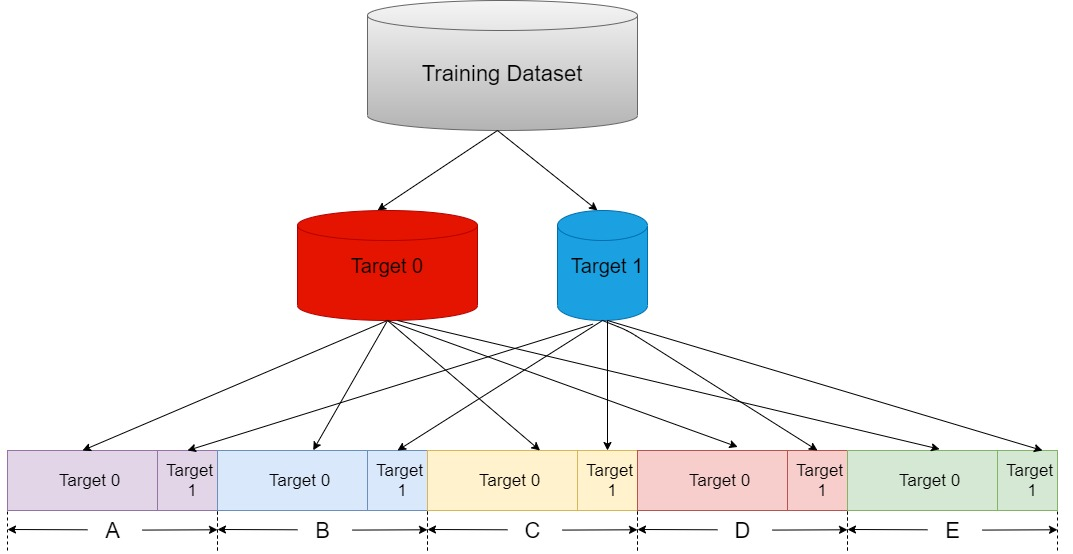

## Demonstration

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.simplefilter('ignore')

In [ ]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)
df.head()

In [ ]:
X = df.drop('target',axis=1)
y = df['target'].astype('category')

## Use manual train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
lr_manual = LogisticRegression()
lr_manual.fit(X_train,y_train)

In [ ]:
confusion_matrix(y_test,lr_manual.predict(X_test))

## Use StratifiedKFold

In [ ]:
kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=45)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    
    ### Training Set
    xtr,xvl = X.iloc[train_index],X.iloc[test_index]
    
    ### Validation Set
    ytr,yvl = y.iloc[train_index],y.iloc[test_index]
    
    #model
    lr = LogisticRegression(C=2)
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)
    
#     pred_test = lr.predict_proba(x_test)[:,1]
#     pred_test_full +=pred_test
    i+=1

In [ ]:
print('Confusion matrix\n',confusion_matrix(yvl,lr.predict(xvl)))
print('Cv',cv_score,'\nMean cv Score',np.mean(cv_score))

#### here I use logistic regression for demonstrate the k-fold. you can use any algorithm.